In [12]:
import matplotlib.pyplot as plt
import numpy as np

<Figure size 864x720 with 0 Axes>

In [13]:
eps = 0.0001

global coefs
coefs = [1, 2, -8, -16, 11, 28, 12]

f = np.poly1d(coefs)

# golden ratio
phi = (np.sqrt(5) + 1) / 2

In [14]:
def equation_in_str(coefs):
    s = ''
    for pow, coef in enumerate(coefs[::-1][:-1]):
        s += f'{coef}*x^{pow} + '

    s += f'{coefs[0]}*x^{len(coefs)-1}'

    return s

equation_in_str(coefs)

'12*x^0 + 28*x^1 + 11*x^2 + -16*x^3 + -8*x^4 + 2*x^5 + 1*x^6'

#### Example of the function that we are using (plot)

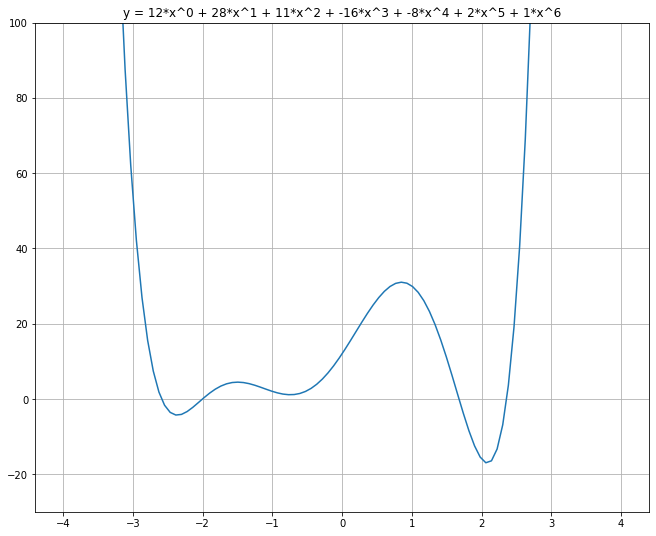

In [101]:
fig = plt.figure(figsize=(11, 9))

x = np.linspace(-4, 4, 100)
y = f(x)

plt.plot(x, y)
plt.title('y = ' + equation_in_str(coefs))
plt.ylim(-30, 100)
plt.grid()
plt.show()

In [18]:
def diff_(f):
    return np.polyder(f)

In [102]:
def check_if_unimodal(f, a, b):
    F = diff_(f)
    roots = np.roots(F)
    good_x = [x for x in roots if a < x < b]
    if len(good_x) != 1:
        return False
    return True

In [104]:
def max_golden_section(f, a, b, eps, min_max):
    # to find the minimum(maximum) of f on [a,b]
    # f: a strictly unimodal function on [a,b]
    # To find the minimum (maximum), change min_max value in function arguments

    c = b - (b - a) / phi
    d = a + (b - a) / phi
    while abs(b - a) > eps:
        if min_max == 'min':
            if f(c) < f(d):
                b = d
            else:
                a = c
        else:
            if f(c) >= f(d):
                b = d
            else:
                a = c

        # We recompute c and d  to avoid loss of precision 
        c = b - (b - a) / phi
        d = a + (b - a) / phi

    # extremum is between current bounds
    ans = (b + a) / 2
    return round(ans, 2), round(f(ans), 2)


##### Example of minimum of function using Golden section method for x є [a, b]

Find max using golden section method from 0 to 2


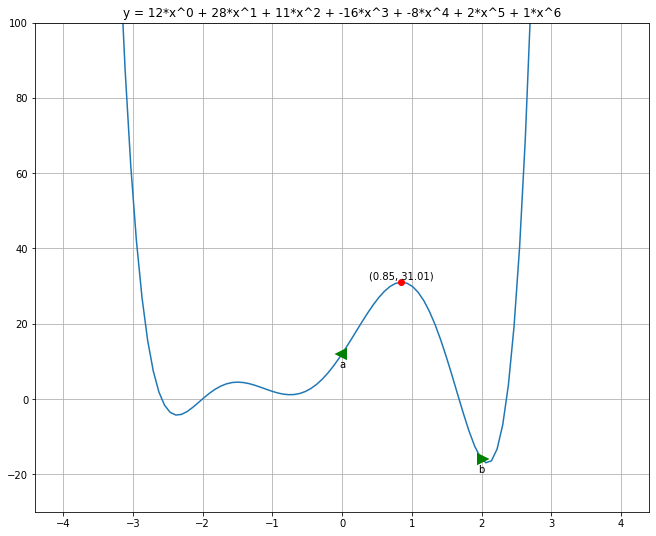

NOTE: if you dont see the red point(extremum) you have to change min_max value


In [98]:
x = np.linspace(-4, 4, 100)
y = f(x)

a = 0
b = 2
min_max = 'max'

if check_if_unimodal(f, a, b):
    ext = max_golden_section(f, a, b, eps, min_max)
    
    print(f'Find {min_max} using golden section method from {a} to {b}')
    
    fig = plt.figure(figsize=(11, 9))
    
    plt.plot(x, y)
    plt.plot(*ext, marker='o', color='r') # plot extremum
    plt.plot(a, f(a), marker='<', color='g', markeredgewidth=4) # plot left border (a)
    plt.plot(b, f(b), marker='>', color='g', markeredgewidth=4) # plot right border (b)
    
    plt.text(ext[0], ext[1] + 1, f'({ext[0]}, {ext[1]})', horizontalalignment='center')
    plt.text(a, f(a) - 3.5, 'a', horizontalalignment='center')
    plt.text(b, f(b) - 3.5, 'b', horizontalalignment='center')
    
    plt.title('y = ' + equation_in_str(coefs))
    plt.ylim(-30, 100)
    plt.grid()
    plt.show()
    print('NOTE: if you dont see the red point(extremum) you have to change min_max value')
else:
    print(f'This function from {a} to {b} is not unimodal. Please change the range')

In [85]:
def max_ternary_search(f, a, b, eps, min_max):
    # Find maximum of unimodal function between a and b
    # To find the minimum, reverse the if/else statement or reverse the comparison.
    
    while abs(b - a) >= eps:
        left_t = a + (b - a) / 3
        right_t = b - (b - a) / 3

        if min_max == 'max':
            if f(left_t) > f(right_t):
                b = right_t
            else:
                a = left_t
        else:
            if f(left_t) <= f(right_t):
                b = right_t
            else:
                a = left_t

    # maximum is between current bounds
    ans = (b + a) / 2
    return round(ans, 2), round(f(ans), 2)


##### Example of minimum of function using Ternary Search method for x є [a, b]

Find min using ternary search method from -1.3 to 0.5


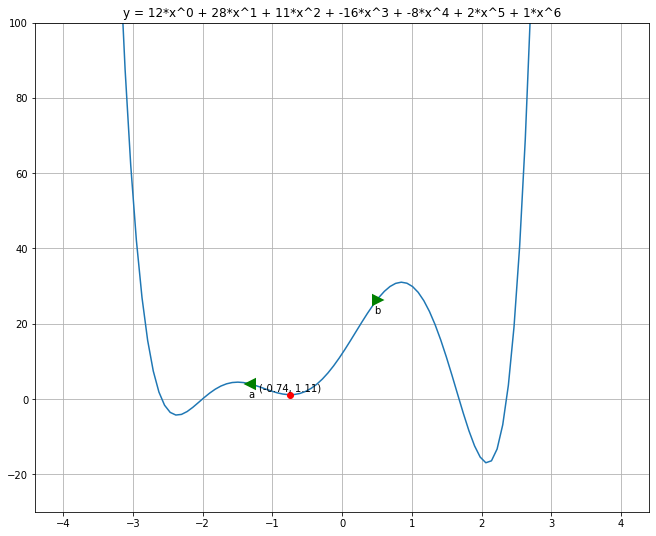

NOTE: if you dont see the red point(extremum) you have to change min_max value


In [97]:
x = np.linspace(-4, 4, 100)
y = f(x)

a = -1.3
b = 0.5
min_max = 'min'

if check_if_unimodal(f, a, b):
    ext = max_ternary_search(f, a, b, eps, min_max)
    print(f'Find {min_max} using ternary search method from {a} to {b}')
    
    fig = plt.figure(figsize=(11, 9))
    
    plt.plot(x, y)
    plt.plot(*ext, marker='o', color='r') # plot extremum
    plt.plot(a, f(a), marker='<', color='g', markeredgewidth=4) # plot left border (a)
    plt.plot(b, f(b), marker='>', color='g', markeredgewidth=4) # plot right border (b)
    
    plt.text(ext[0], ext[1] + 1, f'({ext[0]}, {ext[1]})', horizontalalignment='center')
    plt.text(a, f(a) - 3.5, 'a', horizontalalignment='center')
    plt.text(b, f(b) - 3.5, 'b', horizontalalignment='center')
    
    plt.title('y = ' + equation_in_str(coefs))
    plt.ylim(-30, 100)
    plt.grid()
    plt.show()
    print('NOTE: if you dont see the red point(extremum) you have to change min_max value')
else:
    print(f'This function from {a} to {b} is not unimodal. Please change the range')

### Newton's method. 
#### This method finds the root f(x) = 0. (As we all know extremums occur when tangent is horizontal and this is exactly when F(x) = 0 (f'(x) = 0)). 

Newton's method is a root finding method that uses linear approximation. In particular, we guess a solution x0 of the equation f(x) = 0, compute the linear approximation of f(x) at x0 and then find the x-intercept of the linear approximation.

In [19]:
def newton(f0, x0, eps, max_iter):
    # Approximate solution of f(x)=0 by Newton's method. (we have to count F(x) = 0 so we differentiate twice)

    # Implement Newton's method: compute the linear approximation
    # of f(x) at xn and find x intercept by the formula
    #     x = xn - f(xn)/F(xn)
    # Continue until abs(f(xn)) < eps and return xn.
    # If F(xn) == 0, return None. If the number of iterations
    # exceeds max_iter, then return None.

    
    f = diff_(f0)
    F = diff_(f)

    xn = x0
    for n in range(0,max_iter):
        fxn = f(xn)
        if abs(fxn) < eps:
            # print('Found solution after',n,'iterations.')
            return xn
        Fxn = F(xn)
        if Fxn == 0:
            print('Zero derivative. No solution found.')
            return None
        xn = xn - fxn/Fxn
    print('Exceeded maximum iterations. No solution found.')
    return None


####  As long as in Newton's method we have to take a guess of aproximately where the extremum is, i decided to initially create 50 guesses from xє[-20, 20] to find all extremums in my function

[[-2.36, -4.31], [2.08, -17.05], [-1.5, 4.45], [-0.74, 1.11], [0.85, 31.01]]


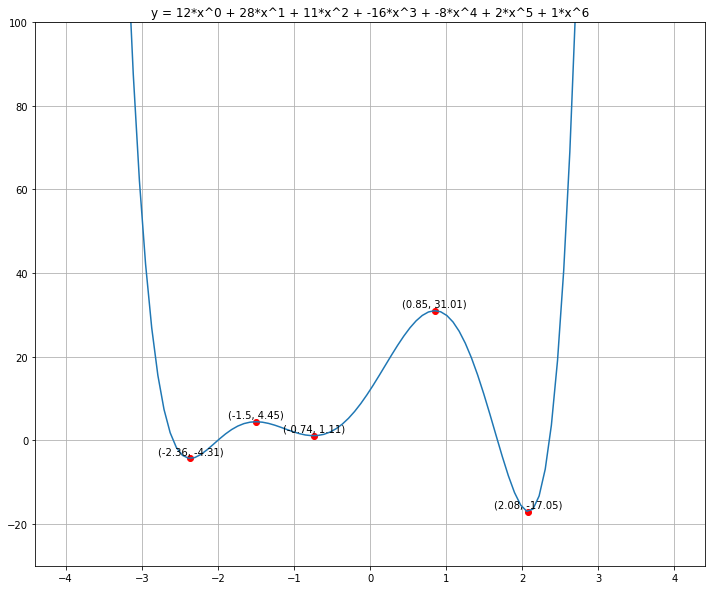

In [99]:
fig = plt.figure(figsize=(12, 10))

all_extremum = []

for guess in np.linspace(-20, 20, 50):
    ext = round(newton(f, guess, eps, 50), 2) # find extremum value nearest to guess 
    if ext and ext not in map(lambda x: x[0], all_extremum):
        all_extremum.append([ext, round(f(ext), 2)])

print(all_extremum)

x = np.linspace(-4, 4, 100)
y = f(x)

str_eq = equation_in_str(coefs)

for p in all_extremum:
    plt.plot(*p, marker='o', color='r')
    plt.text(p[0], p[1] + 1, f'({p[0]}, {p[1]})', horizontalalignment='center')

plt.title('y = ' + str_eq)
plt.ylim(-30, 100)
plt.grid()
plt.plot(x, y)
plt.show()